In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_one_hot = pd.get_dummies(insurance).astype(int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [4]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [5]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [7]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0
1285,47,24,0,1,0,1,0,1,0,0,0
1142,52,24,0,1,0,1,0,0,0,1,0
969,39,34,5,1,0,1,0,0,0,1,0
486,54,21,3,1,0,1,0,0,1,0,0


In [8]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu'),
    #tf.keras.layers.Dropout(0.3,trainable=True),
    #tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Dense(64,activation='relu'),
    #tf.keras.layers.BatchNormalization(trainable=True),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    #tf.keras.layers.Dropout(0.2,trainable=True),
    #tf.keras.layers.LeakyReLU(alpha=0.01,trainable=True),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics =['mae'])

#insurance_model.summary()
history = insurance_model.fit(X_train, y_train, epochs = 100, batch_size = 256,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 13321.4209 - mae: 13321.4209
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 12888.3867 - mae: 12888.3867
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 10264.7979 - mae: 10264.7979
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 8440.9619 - mae: 8440.9619
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 7595.8252 - mae: 7595.8252
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 8045.4775 - mae: 8045.4775
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 7374.8369 - mae: 7374.8369
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 7296.6943 - mae: 7296.6943
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 7314.4985 - mae: 7314.4985
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 7109.7231 - mae: 7109.7231
Epoch 11/100


In [9]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2037.4342 - mae: 2037.4342


[2037.4342041015625, 2037.4342041015625]

In [10]:
y_train.median(), y_train.mean()

(9574.5, 13345.596261682243)

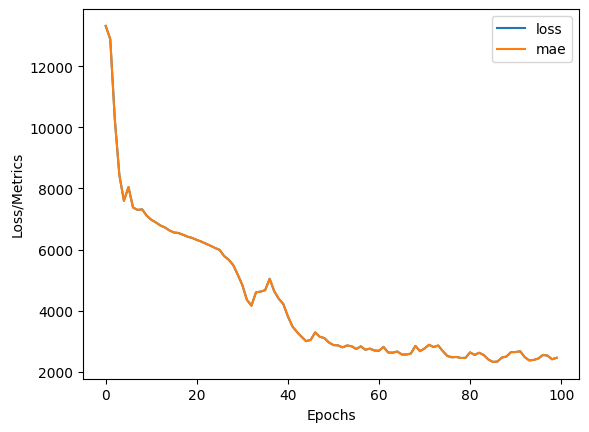

In [11]:

pd.DataFrame(history.history).plot()
plt.ylabel("Loss/Metrics")
plt.xlabel("Epochs")
plt.show()